# SALES DATA CLEANING

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('sales_three.csv', parse_dates = ['Segment'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9568\4136742864.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('sales_three.csv', parse_dates = ['Segment'])


In [5]:
df.head()

,Order ID,Segment,First Consumer,First Corporate,First Home Office,Same Consumer,Same Corporate,Same Home Office,Second Consumer,Second Corporate,Second Home Office,Standard Consumer,Standard Corporate,Standard Home Office
0,CA-2011-100293,2013-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056
1,CA-2011-100706,2013-12-16,NaN,NaN,NaN,NaN,NaN,NaN,129.44,NaN,NaN,NaN,NaN,NaN
2,CA-2011-100895,2013-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.47,NaN,NaN
3,CA-2011-100916,2013-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.86,NaN
4,CA-2011-101266,2013-08-27,NaN,NaN,NaN,NaN,NaN,NaN,13.36,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              823 non-null    object        
 1   Segment               822 non-null    datetime64[ns]
 2   First Consumer        73 non-null     float64       
 3   First Corporate       41 non-null     float64       
 4   First Home Office     13 non-null     float64       
 5   Same Consumer         29 non-null     float64       
 6   Same Corporate        6 non-null      float64       
 7   Same Home Office      7 non-null      float64       
 8   Second Consumer       92 non-null     float64       
 9   Second Corporate      51 non-null     float64       
 10  Second Home Office    24 non-null     float64       
 11  Standard Consumer     254 non-null    float64       
 12  Standard Corporate    153 non-null    float64       
 13  Standard Home Office

## For correct dates, dates should not be null, otherwise drop the null row

In [8]:
df.dropna(subset = 'Segment', axis = 0, inplace = True)

In [9]:
first_df = df.loc[:, ['Order ID', 'Segment', 'First Consumer', 'First Corporate', 'First Home Office']]
same_df = df.loc[:, ['Order ID', 'Segment', 'Same Consumer', 'Same Corporate', 'Same Home Office']]
second_df = df.loc[:, ['Order ID', 'Segment', 'Second Consumer', 'Second Corporate', 'Second Home Office']]
standard_df = df.loc[:, ['Order ID', 'Segment', 'Standard Consumer', 'Standard Corporate', 'Standard Home Office']]

In [10]:
first_df.head()

,Order ID,Segment,First Consumer,First Corporate,First Home Office
0,CA-2011-100293,2013-03-14,NaN,NaN,NaN
1,CA-2011-100706,2013-12-16,NaN,NaN,NaN
2,CA-2011-100895,2013-06-02,NaN,NaN,NaN
3,CA-2011-100916,2013-10-21,NaN,NaN,NaN
4,CA-2011-101266,2013-08-27,NaN,NaN,NaN


In [11]:
first_df['Ship_Mode'] = 'First Class'
same_df['Ship_Mode'] = 'Same Day'
second_df['Ship_Mode'] = 'Second day'
standard_df['Ship_Mode'] = 'Standard Class'

In [12]:
# dropping if the columns has more than two null values
first_df.dropna(thresh = first_df.shape[1] - 2, axis = 0, inplace = True)
same_df.dropna(thresh = same_df.shape[1] - 2, axis = 0, inplace = True)
second_df.dropna(thresh = second_df.shape[1]- 2, axis = 0, inplace = True)
standard_df.dropna(thresh = standard_df.shape[1]-2, axis = 0, inplace = True)

In [13]:
first_df.rename(columns = {'Segment': 'Order Date','First Consumer': 'Consumer', 'First Corporate': 'Corporate', 'First Home Office': 'Home Office'}, inplace = True)
same_df.rename(columns = {'Segment': 'Order Date','Same Consumer': 'Consumer', 'Same Corporate': 'Corporate', 'Same Home Office': 'Home Office'}, inplace = True)
second_df.rename(columns = {'Segment': 'Order Date','Second Consumer': 'Consumer', 'Second Corporate': 'Corporate', 'Second Home Office': 'Home Office'}, inplace = True)
standard_df.rename(columns = {'Segment': 'Order Date','Standard Consumer': 'Consumer', 'Standard Corporate': 'Corporate', 'Standard Home Office': 'Home Office'}, inplace = True)

In [14]:
first_df['Segment'] = first_df.apply(lambda row: row.dropna().index[2], axis = 1)
same_df['Segment'] = same_df.apply(lambda row: row.dropna().index[2], axis = 1)
second_df['Segment'] = second_df.apply(lambda row: row.dropna().index[2], axis = 1)
standard_df['Segment'] = standard_df.apply(lambda row: row.dropna().index[2], axis = 1)

In [15]:
first_df.head()

,Order ID,Order Date,Consumer,Corporate,Home Office,Ship_Mode,Segment
10,CA-2011-103317,2013-07-05,NaN,242.546,NaN,First Class,Corporate
11,CA-2011-103366,2013-01-15,149.95,NaN,NaN,First Class,Consumer
13,CA-2011-103989,2013-03-19,NaN,590.762,NaN,First Class,Corporate
15,CA-2011-106054,2013-01-06,NaN,12.780,NaN,First Class,Corporate
20,CA-2011-109043,2013-08-15,243.60,NaN,NaN,First Class,Consumer


In [16]:
df = pd.concat([first_df, same_df, second_df, standard_df], ignore_index = True)
df.head()

,Order ID,Order Date,Consumer,Corporate,Home Office,Ship_Mode,Segment
0,CA-2011-103317,2013-07-05,NaN,242.546,NaN,First Class,Corporate
1,CA-2011-103366,2013-01-15,149.95,NaN,NaN,First Class,Consumer
2,CA-2011-103989,2013-03-19,NaN,590.762,NaN,First Class,Corporate
3,CA-2011-106054,2013-01-06,NaN,12.780,NaN,First Class,Corporate
4,CA-2011-109043,2013-08-15,243.60,NaN,NaN,First Class,Consumer


In [17]:
df = df.fillna(0)
df['Sales'] = df['Consumer'] + df['Corporate'] + df['Home Office']
df.head()

,Order ID,Order Date,Consumer,Corporate,Home Office,Ship_Mode,Segment,Sales
0,CA-2011-103317,2013-07-05,0.00,242.546,0.0,First Class,Corporate,242.546
1,CA-2011-103366,2013-01-15,149.95,0.000,0.0,First Class,Consumer,149.950
2,CA-2011-103989,2013-03-19,0.00,590.762,0.0,First Class,Corporate,590.762
3,CA-2011-106054,2013-01-06,0.00,12.780,0.0,First Class,Corporate,12.780
4,CA-2011-109043,2013-08-15,243.60,0.000,0.0,First Class,Consumer,243.600


In [18]:
df.drop(columns = ['Consumer', 'Corporate', 'Home Office'], inplace = True)

In [19]:
# Dropping grand total row
df.drop(df[df['Sales'] == 227613.5535].index, inplace = True)

In [20]:
df.head()

,Order ID,Order Date,Ship_Mode,Segment,Sales
0,CA-2011-103317,2013-07-05,First Class,Corporate,242.546
1,CA-2011-103366,2013-01-15,First Class,Consumer,149.950
2,CA-2011-103989,2013-03-19,First Class,Corporate,590.762
3,CA-2011-106054,2013-01-06,First Class,Corporate,12.780
4,CA-2011-109043,2013-08-15,First Class,Consumer,243.600


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order ID    822 non-null    object        
 1   Order Date  822 non-null    datetime64[ns]
 2   Ship_Mode   822 non-null    object        
 3   Segment     822 non-null    object        
 4   Sales       822 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 32.2+ KB


## Cleaning Data that will be used in task 2

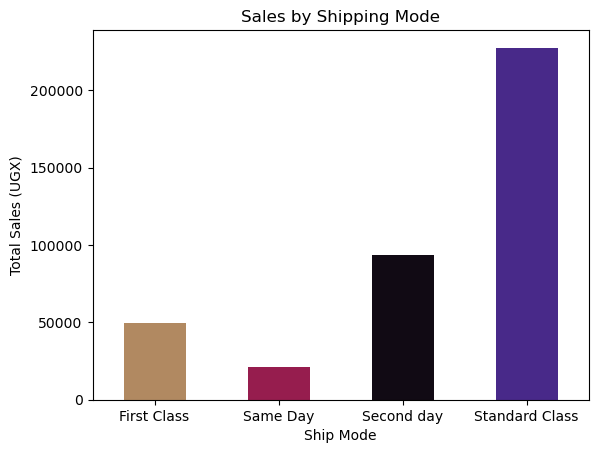

In [75]:
ship_counts = df.groupby(['Ship_Mode'])['Sales'].sum()
ship_counts.plot(kind = 'bar', rot = 0, color = ['#B18961', '#961D4E', '#110A14', '#482989'])
plt.title('Sales by Shipping Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales (UGX)');

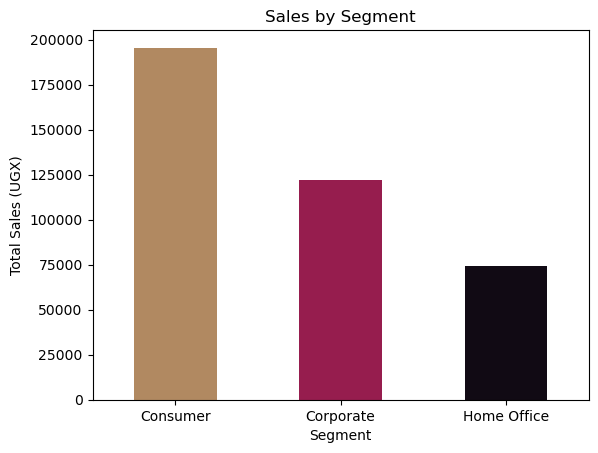

In [79]:
ship_counts = df.groupby(['Segment'])['Sales'].sum()
ship_counts.plot(kind = 'bar', rot = 0, color = ['#B18961', '#961D4E', '#110A14', '#482989'])
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales (UGX)');

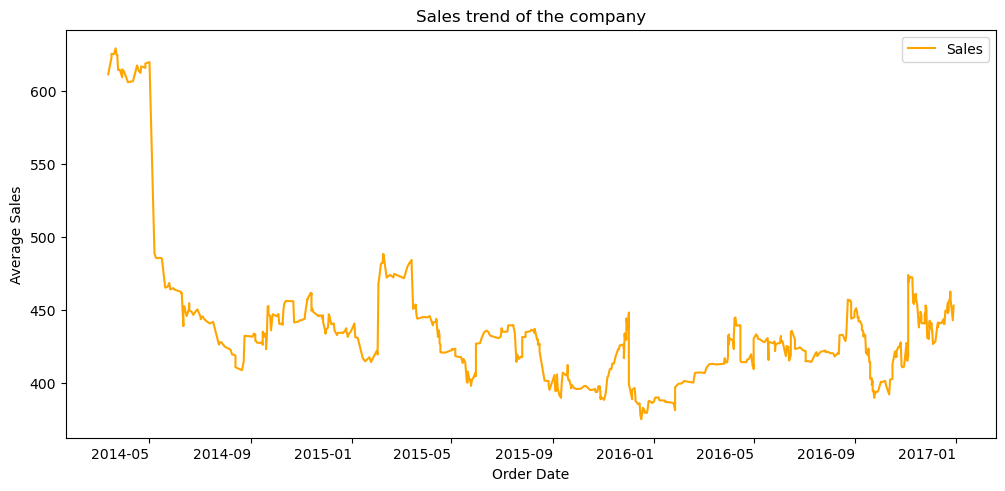

In [124]:
total_sales = df.drop(columns = ['Order ID', 'Ship_Mode', 'Segment']).set_index('Order Date').sort_index()
total_sales.rolling(180).mean().plot(color = 'orange', 
                                            rot= 0,
                                           figsize = (12,6),
                                           title = 'Sales trend of the company',
                                           ylabel = 'Average Sales',
                                           xlabel = 'Order Date');

In [553]:
#total_sales.to_csv('total_sales_three.csv')